<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/Food-Demand-Forecasting_HACKATHON_Repo/blob/main/Food_Demand_Forecasting_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

### The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

In [ ]:
# IMporting the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# Import the necessary library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# loading the dataset
train=pd.read_csv("C:/Users/Lenovo/Desktop/python excercise/HACKATHON PROJECTS/Food Demand Forecasting/train.csv")
fulfilment_center=pd.read_csv("C:/Users/Lenovo/Desktop/python excercise/HACKATHON PROJECTS/Food Demand Forecasting/fulfilment_center_info.csv")
meal_info=pd.read_csv("C:/Users/Lenovo/Desktop/python excercise/HACKATHON PROJECTS/Food Demand Forecasting/meal_info.csv")


In [ ]:
# reading the dataset
train.head(4)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54


In [ ]:
train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [ ]:
# reading the dataset
fulfilment_center.head(4)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1


In [ ]:
# reading the dataset
meal_info.head(4)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian


In [ ]:
# merging the dataset
train=train.merge(meal_info,on='meal_id',how='left')

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian


In [ ]:
train = train.merge(fulfilment_center, on='center_id', how='left')

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [ ]:
# Checking the null values in dataset
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [ ]:
# Checking the duplicate values in the dataset
train.duplicated().sum()

0

In [ ]:
# Checking the info(dtype,null count, storage) in the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [ ]:
print(train.columns) ## Checking the columns
print(train.shape) ## Checking the rows and columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')
(456548, 15)


In [ ]:
# Summary of Dataset
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
train['cuisine'].value_counts() # Checking the total number of cuisine in our dataset

cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: count, dtype: int64

## Exploratory Data Analysis:

### Univariate Analysis:

<Axes: xlabel='cuisine'>

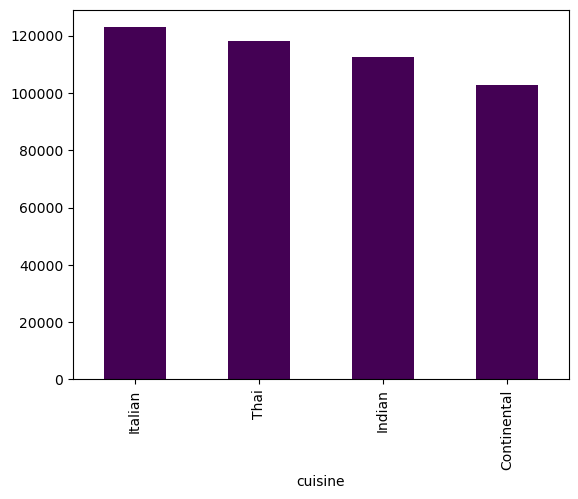

In [ ]:
# Univariate of Food Cuisine:
train['cuisine'].value_counts().plot.bar(cmap='viridis')

<Axes: ylabel='count'>

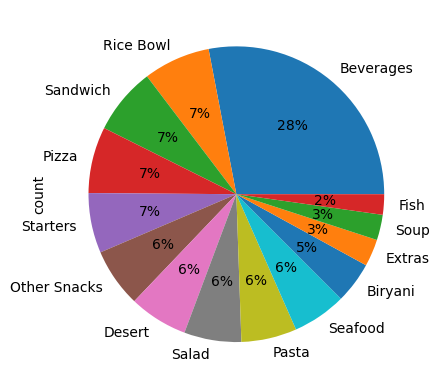

In [ ]:
train['category'].value_counts().plot.pie(autopct='%.0f%%') # Understanding the Different Category and it's percentage

(array([3.91947e+05, 4.63850e+04, 1.07230e+04, 3.80700e+03, 1.64900e+03,
        8.06000e+02, 4.24000e+02, 2.61000e+02, 1.56000e+02, 1.08000e+02,
        6.00000e+01, 5.40000e+01, 3.30000e+01, 3.80000e+01, 2.30000e+01,
        1.10000e+01, 1.40000e+01, 8.00000e+00, 1.20000e+01, 3.00000e+00,
        7.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.300000e+01, 4.987200e+02, 9.844400e+02, 1.470160e+03,
        1.955880e+03, 2.441600e+03, 2.927320e+03, 3.413040e+03,
        3.898760e+03, 4.384480e+03, 4.870200e+03, 5.355920e+03,
        5.841640e+03, 6.327360e+03, 6.813080e+03, 7.298800e+03,
        7.78

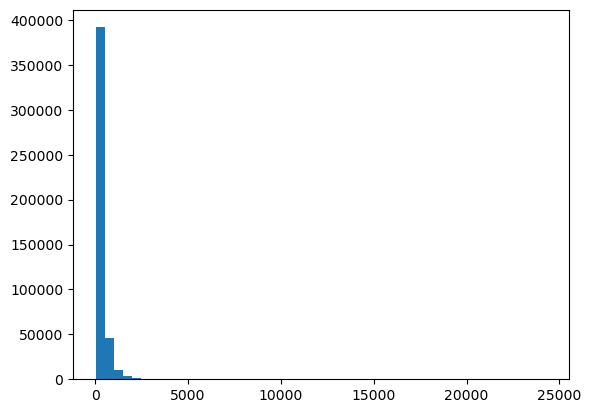

In [ ]:
plt.hist(train['num_orders'],bins=50)

Text(0.5, 0, 'num_orders')

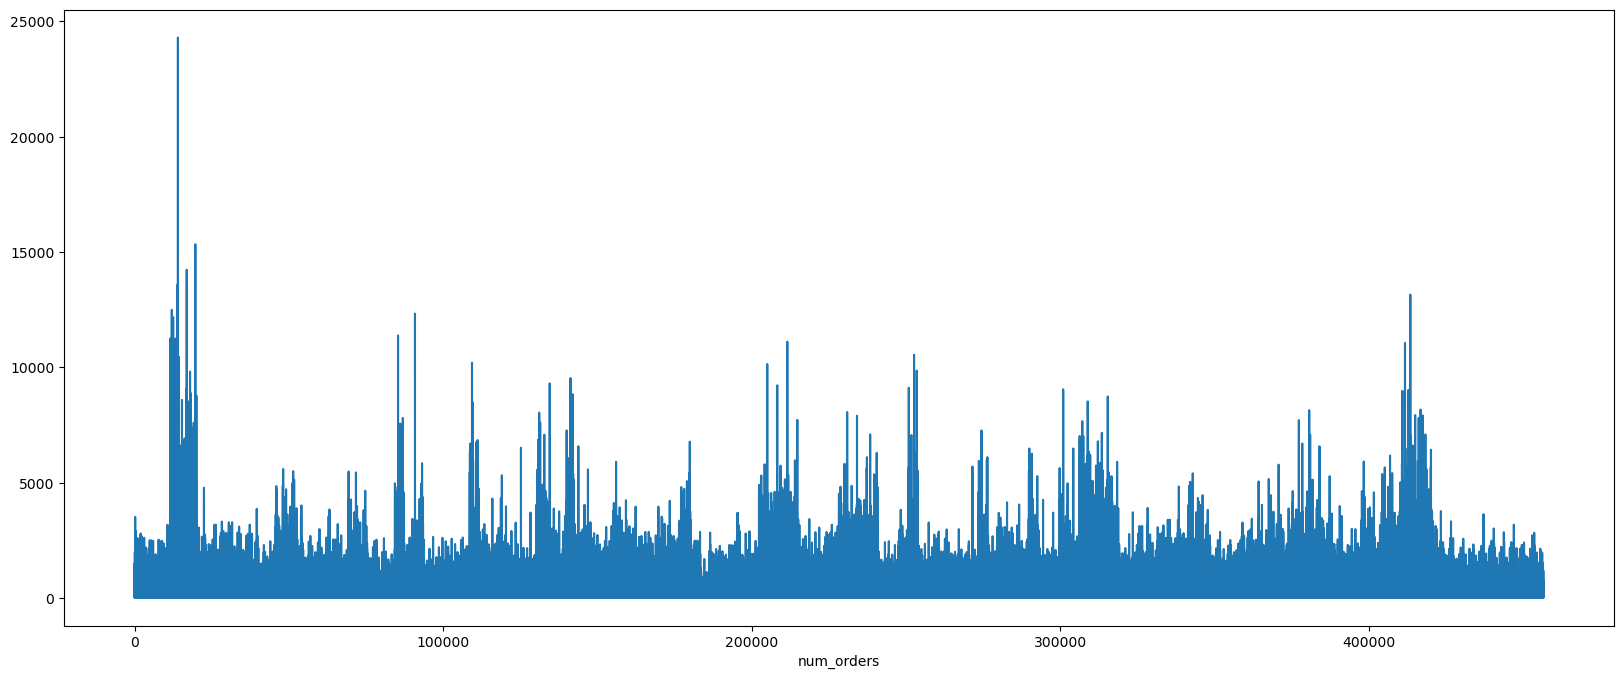

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train['num_orders'])
plt.xlabel('num_orders')

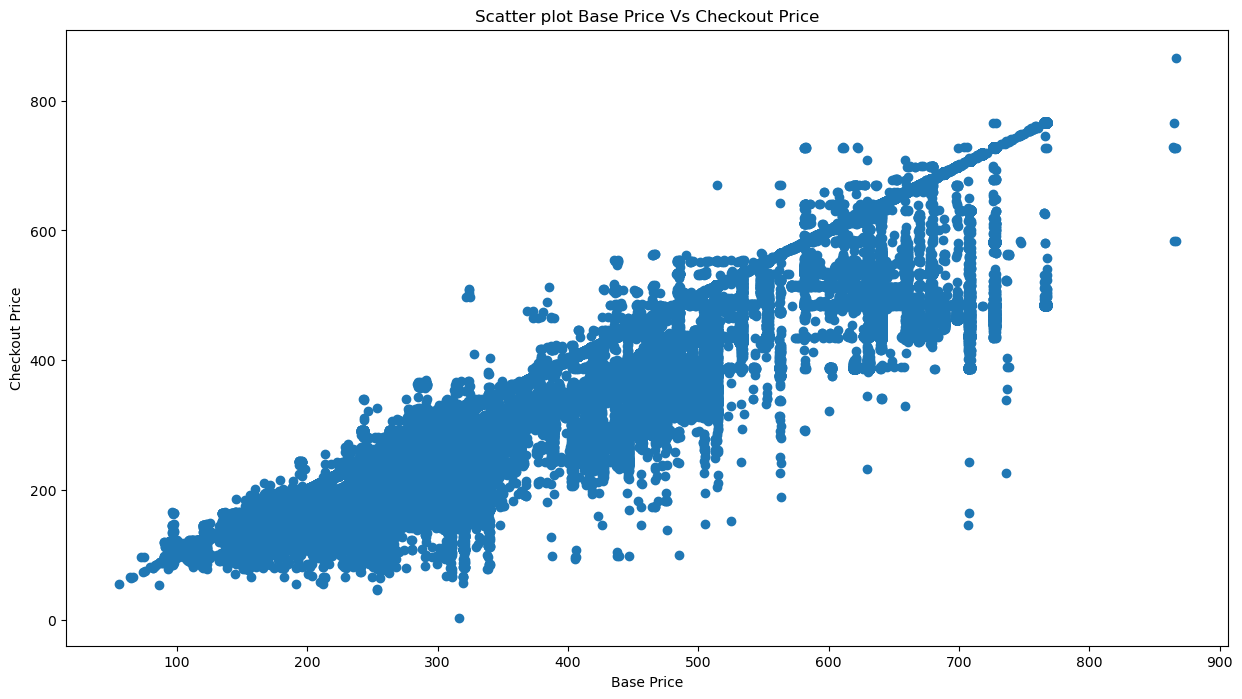

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(train['base_price'], train['checkout_price'])
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.show()

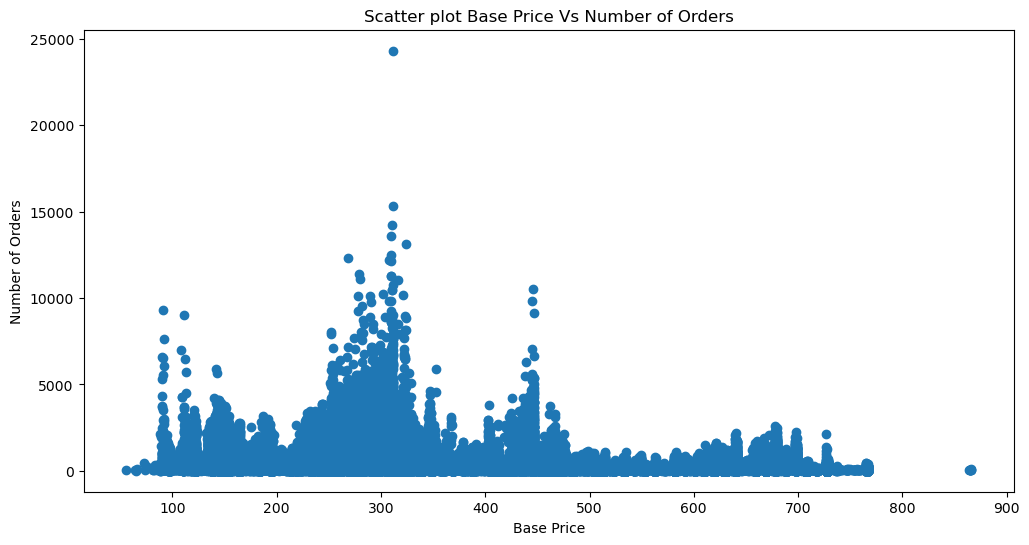

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(train['base_price'], train['num_orders'])
plt.title('Scatter plot Base Price Vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
# sns.heatmap(train.corr(),annot=True,fmt='.2g')
# sns.pairplot(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [ ]:
train['category']

0         Beverages
1         Beverages
2         Beverages
3         Beverages
4         Beverages
            ...    
456543       Desert
456544       Desert
456545        Salad
456546        Salad
456547        Salad
Name: category, Length: 456548, dtype: object

In [ ]:
train['cuisine']

0            Thai
1            Thai
2            Thai
3          Indian
4          Indian
           ...   
456543     Indian
456544     Indian
456545    Italian
456546    Italian
456547    Italian
Name: cuisine, Length: 456548, dtype: object

In [ ]:
train['center_type']

0         TYPE_C
1         TYPE_C
2         TYPE_C
3         TYPE_C
4         TYPE_C
           ...  
456543    TYPE_A
456544    TYPE_A
456545    TYPE_A
456546    TYPE_A
456547    TYPE_A
Name: center_type, Length: 456548, dtype: object

In [ ]:
# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to your categorical column (e.g., 'category')
train['category'] = label_encoder.fit_transform(train['category'])
train['cuisine'] = label_encoder.fit_transform(train['cuisine'])
train['center_type'] = label_encoder.fit_transform(train['center_type'])

In [ ]:
# Check the unique encoded values
print(train['category'].unique())
print(train['cuisine'].unique())
print(train['center_type'].unique())

[ 0  8 13  6 10  1  3  7 11  5  2 12  9  4]
[3 1 2 0]
[2 1 0]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  int32  
 10  cuisine                456548 non-null  int32  
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int32  
 14  op_area                456548 non-nu

In [ ]:
train.shape

(456548, 15)

<Axes: >

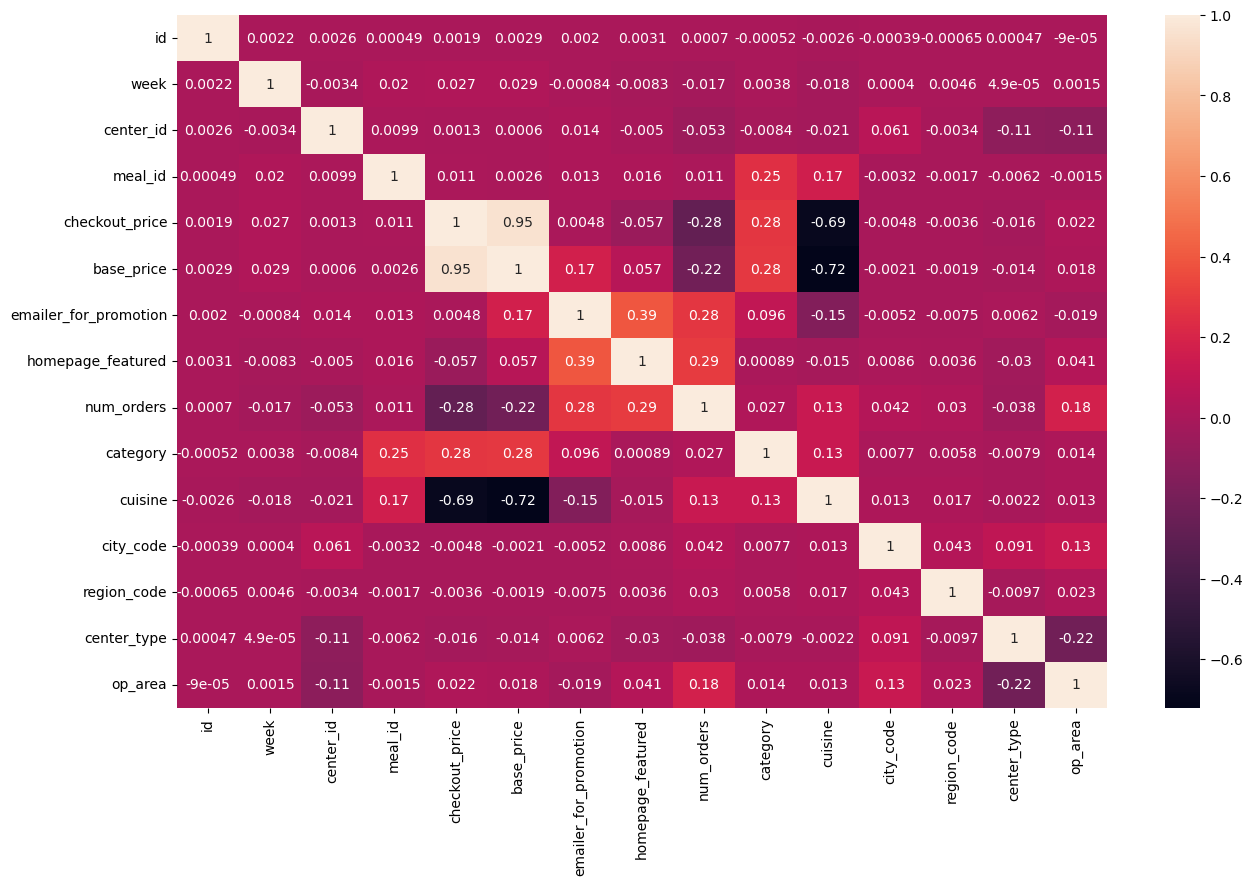

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),annot=True)

In [ ]:
# splitting the data into independent(X) and dependent(y) variables
X=train.drop('num_orders',axis=1)
y=train['num_orders']

In [ ]:
# Creating object
Scaler= StandardScaler()
# Fit and Transform
X= Scaler.fit_transform(X)

In [ ]:
print(X.shape)
print(y.shape)

(456548, 14)
(456548,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking the shape after spliting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((365238, 14), (91310, 14), (365238,), (91310,))

## model: LINEAR REGRESSION

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [ ]:
# Fitting the model into training set
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting on test set
y_pred_LR=model_LR.predict(X_test)

In [ ]:
y_pred_LR

array([-66.00413974, 283.13415681, 390.83265689, ..., 332.46115435,
       260.93660786, 284.87666227])

In [ ]:
print(y_pred_LR.shape)
print('Coefficient of model :',model_LR.coef_)
print('Intercept of model :',model_LR.intercept_)

(91310,)
Coefficient of model : [ 5.93347014e-02 -2.72640265e+00 -1.57347209e+01 -1.05645003e-01
 -7.10802675e+01 -1.12302819e+02  8.13704038e+01  8.32161413e+01
  6.27136360e+01 -7.53982630e+01  8.30129914e+00  1.06464179e+01
 -3.00035073e+00  6.83663071e+01]
Intercept of model : 261.9106884766378


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LR)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LR, squared=False)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
# rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_LR))


In [ ]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 114819.27364930819
RMSE: 338.8499279169293


In [ ]:
# Ensure that y_test and y_pred_LR contain non-negative values
y_test_non_negative = np.maximum(0, y_test)
y_pred_LR_non_negative = np.maximum(0, y_pred_LR)

In [ ]:

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test_non_negative, y_pred_LR_non_negative))

In [ ]:
print(f"RMSLE: {rmsle}")

RMSLE: 1.5759057093426825


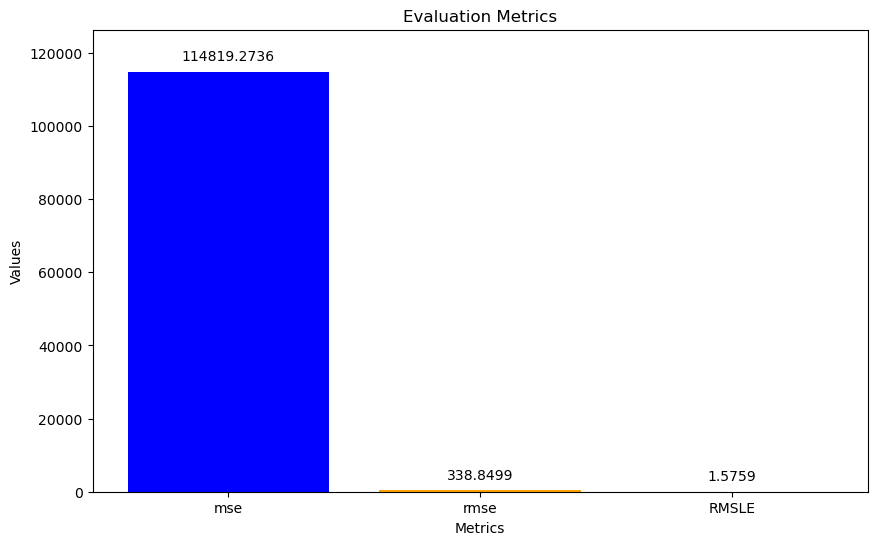

In [ ]:
# Visualization
metrics = ['mse', 'rmse', 'RMSLE']
values = [mse, rmse, rmsle]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0, max(values) * 1.1)  # Add some space above the tallest bar
for i, value in enumerate(values):
    plt.text(i, value + 0.02 * max(values), f'{value:.4f}', ha='center', va='bottom')
plt.show()

In [ ]:
# understanding the variables through shap
!pip install shap

In [ ]:
# importing shap
import shap
# define an explainer object for your classifier
explainer = shap.Explainer(model_LR.predict, X_train)

In [ ]:
# calculate SHAP values for your test data
shap_values = explainer(X_test)

PermutationExplainer explainer: 91311it [36:08, 42.01it/s]                                                             


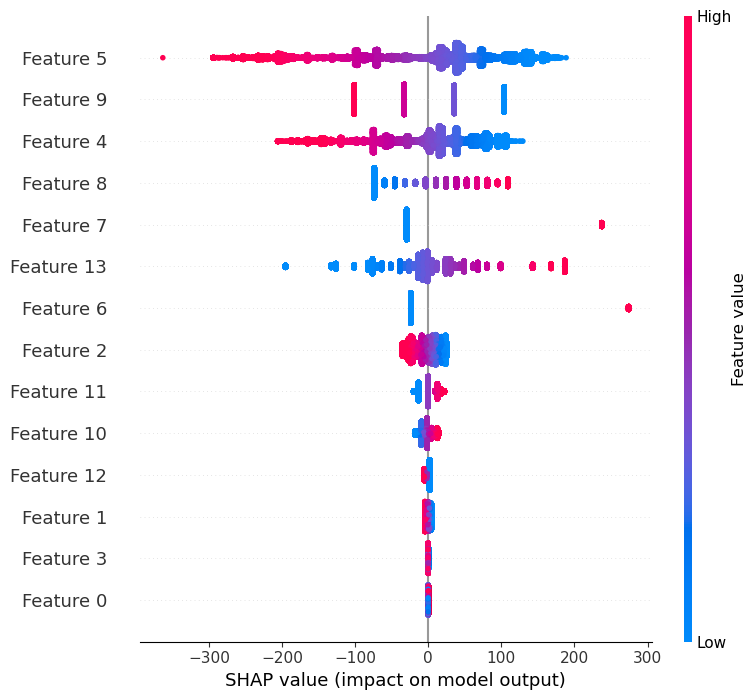

In [ ]:
# visualizing the SHAP values using the summary_plot() function
shap.summary_plot(shap_values, X_test)

## Forecast Using ARIMA-SARIMA Model:

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
# train_size = int(len(train) * 0.8)
# train, test = train[:train_size], train[train_size:]

In [ ]:
# # Train the ARIMAModel
# p, d, q = 1, 1, 1
# model_arima = ARIMA(train, order=(p, d, q))
# results_arima = model_arima.fit()

## Model: Random Forest Regressor

In [ ]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

In [ ]:
y_pred_RF=RF.predict(X_test)

In [ ]:
y_pred_RF

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_RF)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False)

In [ ]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
# Ensure that y_test and y_pred_LR contain non-negative values
y_test_non_negative = np.maximum(0, y_test)
y_pred_LR_non_negative = np.maximum(0, y_pred_RF)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test_non_negative, y_pred_LR_non_negative))

In [ ]:
print('rmsle :',rmsle)

In [ ]:
# Visualization
metrics = ['mse', 'rmse', 'RMSLE']
values = [mse, rmse, rmsle]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['Black', 'orange', 'blue'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0, max(values) * 1.1)  # Add some space above the tallest bar
for i, value in enumerate(values):
    plt.text(i, value + 0.02 * max(values), f'{value:.4f}', ha='center', va='bottom')
plt.show()

## model explainability

In [ ]:
# Create a Tree SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[:,:,1], X_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR()
svr.fit(X_train,y_train)